# Train Custom Model Using Scikit Learn - Squat
## 1. Read in Collected Data and Process

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pickle

In [2]:
df = pd.read_csv('squat_coords_merged.csv')

In [3]:
df.head(3)

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
0,s_spine_neutral,0.578854,0.459936,-0.178820,0.999752,0.594528,0.448642,-0.173299,0.999830,0.594286,...,-0.313403,0.976089,0.302474,0.597096,0.656582,0.806852,0.332788,0.694722,-0.373114,0.985341
1,s_spine_neutral,0.590740,0.410155,-0.341654,0.999727,0.595270,0.397050,-0.327615,0.999847,0.594844,...,-0.305247,0.975016,0.359256,0.611075,0.285869,0.773935,0.334483,0.695383,-0.373157,0.984979
2,s_spine_neutral,0.572588,0.146920,-0.468999,0.999881,0.573966,0.125410,-0.442385,0.999909,0.573949,...,-0.462458,0.976983,0.493459,0.641891,0.653005,0.840647,0.369003,0.695396,-0.618573,0.986593


In [4]:
print(df['class'].unique())

['s_spine_neutral' 's_correct' 's_feet_spread' 's_caved_in_knees']


In [5]:
df[df['class'] == 's_correct']

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
41,s_correct,0.608300,0.256966,-0.431106,0.999722,0.607229,0.243197,-0.412057,0.999674,0.607237,...,-0.140050,0.983610,0.428002,0.616365,0.670916,0.856331,0.352755,0.701794,-0.279221,0.990048
42,s_correct,0.599737,0.346494,-0.311550,0.999204,0.604211,0.333743,-0.291353,0.998982,0.603611,...,-0.410998,0.976408,0.390359,0.594703,0.532225,0.854293,0.351598,0.695906,-0.525832,0.985446
43,s_correct,0.598373,0.340779,-0.362095,0.999372,0.603776,0.328075,-0.345883,0.999226,0.603210,...,-0.210623,0.979708,0.365808,0.593359,0.683543,0.845150,0.349611,0.697701,-0.292301,0.987424
44,s_correct,0.532609,0.085706,-0.563047,0.999811,0.528613,0.068749,-0.532288,0.999753,0.528110,...,-0.082207,0.969725,0.511529,0.649332,0.911253,0.861955,0.352579,0.702522,-0.277348,0.979655
45,s_correct,0.509986,0.080937,-0.561351,0.999886,0.509227,0.065054,-0.525186,0.999847,0.509454,...,0.107706,0.965409,0.501382,0.634013,0.821059,0.894636,0.359056,0.696438,-0.086941,0.978088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,s_correct,0.524261,0.230158,-0.715171,0.999996,0.534665,0.216452,-0.690339,0.999992,0.543338,...,0.495778,0.950799,0.672772,0.693302,0.152547,0.978051,0.416289,0.687267,0.263378,0.990199
732,s_correct,0.541000,0.456970,-1.089696,0.999988,0.551265,0.445129,-1.077393,0.999986,0.560403,...,0.016999,0.972697,0.672578,0.695860,-0.236162,0.966977,0.415652,0.687617,-0.186428,0.987361
733,s_correct,0.547200,0.462096,-1.148919,0.999998,0.557915,0.450873,-1.135555,0.999996,0.565836,...,-0.013015,0.970583,0.673077,0.695627,-0.266733,0.970826,0.415474,0.688746,-0.225075,0.986844
734,s_correct,0.531694,0.461983,-1.081890,0.999996,0.541786,0.451605,-1.083144,0.999991,0.551238,...,-0.014511,0.970803,0.673765,0.696007,-0.240570,0.962730,0.413178,0.687693,-0.204243,0.987096


In [6]:
X = df.drop('class', axis=1)
y = df['class']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 2. Train Machine Learning Classification Model

In [8]:
pipelines = {
    'lr':make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000)),
    'rc':make_pipeline(StandardScaler(), RidgeClassifier()),
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier()),
    'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier()),
}

In [9]:
fit_models = {}
for algorithm, pipeline in pipelines.items():
    model = pipeline.fit(X_train, y_train)
    fit_models[algorithm] = model

In [10]:
fit_models

{'lr': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression(max_iter=1000))]),
 'rc': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('ridgeclassifier', RidgeClassifier())]),
 'rf': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier', RandomForestClassifier())]),
 'gb': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('gradientboostingclassifier', GradientBoostingClassifier())])}

In [11]:
fit_models['rc'].predict(X_test)

array(['s_caved_in_knees', 's_spine_neutral', 's_spine_neutral',
       's_spine_neutral', 's_spine_neutral', 's_correct', 's_feet_spread',
       's_feet_spread', 's_feet_spread', 's_feet_spread',
       's_caved_in_knees', 's_correct', 's_correct', 's_caved_in_knees',
       's_correct', 's_feet_spread', 's_feet_spread', 's_caved_in_knees',
       's_caved_in_knees', 's_caved_in_knees', 's_caved_in_knees',
       's_correct', 's_spine_neutral', 's_feet_spread',
       's_caved_in_knees', 's_caved_in_knees', 's_feet_spread',
       's_spine_neutral', 's_correct', 's_spine_neutral',
       's_caved_in_knees', 's_correct', 's_feet_spread', 's_correct',
       's_caved_in_knees', 's_caved_in_knees', 's_correct',
       's_caved_in_knees', 's_feet_spread', 's_correct', 's_feet_spread',
       's_caved_in_knees', 's_feet_spread', 's_feet_spread', 's_correct',
       's_caved_in_knees', 's_correct', 's_feet_spread',
       's_spine_neutral', 's_spine_neutral', 's_spine_neutral',
       's_f

## 3.Evaluate and Serialize Model

In [12]:
from sklearn.metrics import classification_report

# 예측 결과를 저장할 딕셔너리 초기화
predictions = {}

# 각 모델에 대해 예측 수행
for algorithm, model in fit_models.items():
    y_pred = model.predict(X_test)  # 테스트 데이터에 대한 예측
    predictions[algorithm] = y_pred  # 예측 결과 저장

# 각 모델의 분류 보고서 출력
for algorithm, y_pred in predictions.items():
    print(f'--- {algorithm} 모델 분류 결과 평가 ---')
    print(classification_report(y_test, y_pred))
    print()

--- lr 모델 분류 결과 평가 ---
                  precision    recall  f1-score   support

s_caved_in_knees       1.00      1.00      1.00        79
       s_correct       0.99      0.99      0.99        72
   s_feet_spread       1.00      1.00      1.00        65
 s_spine_neutral       0.98      0.98      0.98        63

        accuracy                           0.99       279
       macro avg       0.99      0.99      0.99       279
    weighted avg       0.99      0.99      0.99       279


--- rc 모델 분류 결과 평가 ---
                  precision    recall  f1-score   support

s_caved_in_knees       1.00      1.00      1.00        79
       s_correct       1.00      0.99      0.99        72
   s_feet_spread       1.00      1.00      1.00        65
 s_spine_neutral       0.98      1.00      0.99        63

        accuracy                           1.00       279
       macro avg       1.00      1.00      1.00       279
    weighted avg       1.00      1.00      1.00       279


--- rf 모델 분류 결과 평가

In [13]:
metrics = {
    'accuracy': {},
    'precision': {},
    'recall': {},
    'f1-score': {}
}

for algorithm, y_pred in predictions.items():
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    metrics['accuracy'][algorithm] = accuracy
    metrics['precision'][algorithm] = precision
    metrics['recall'][algorithm] = recall
    metrics['f1-score'][algorithm] = f1

for metric, values in metrics.items():
    print(f'--- {metric} ---')
    for algorithm, score in values.items():
        print(f'{algorithm}: {score:.4f}')

--- accuracy ---
lr: 0.9928
rc: 0.9964
rf: 1.0000
gb: 1.0000
--- precision ---
lr: 0.9928
rc: 0.9965
rf: 1.0000
gb: 1.0000
--- recall ---
lr: 0.9928
rc: 0.9964
rf: 1.0000
gb: 1.0000
--- f1-score ---
lr: 0.9928
rc: 0.9964
rf: 1.0000
gb: 1.0000


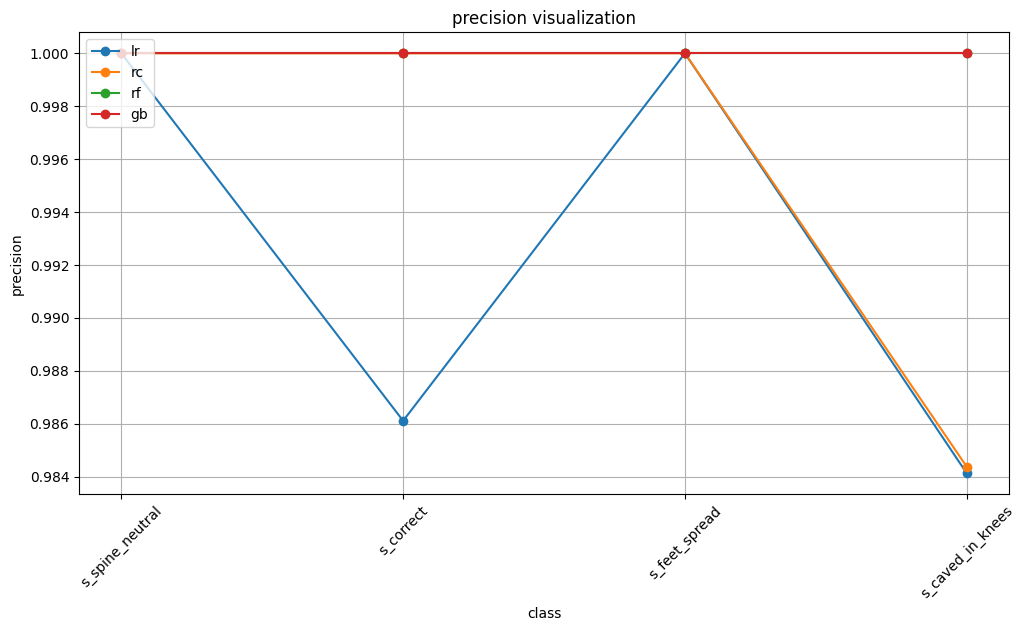

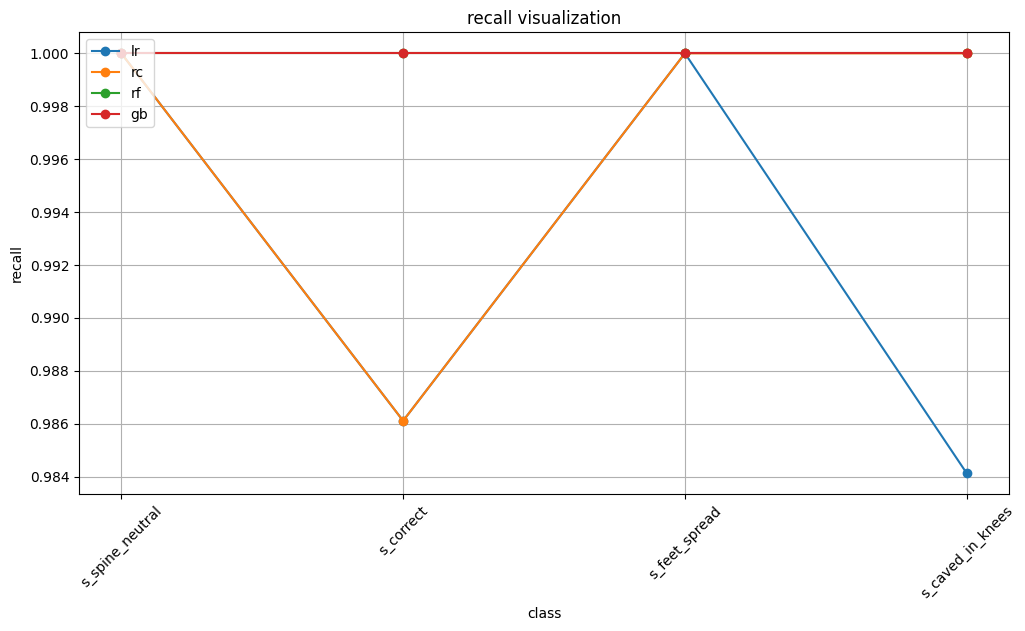

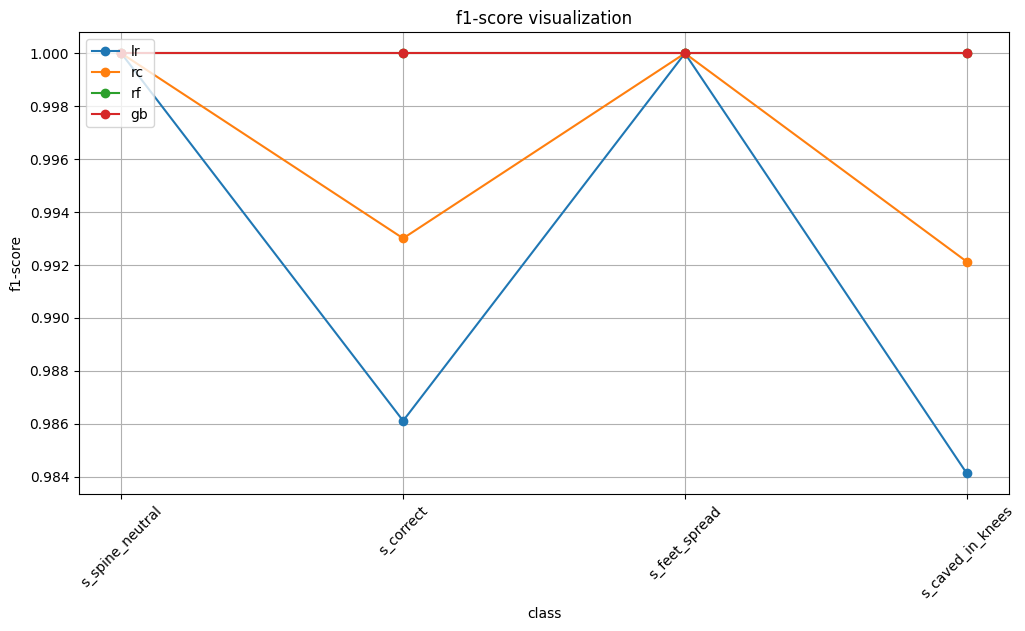

In [14]:
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

predictions = {}

# 각 모델에 대해 예측 수행
for algorithm, model in fit_models.items():
    y_pred = model.predict(X_test)  # 테스트 데이터에 대한 예측
    predictions[algorithm] = y_pred  # 예측 결과 저장

# 평가 지표 시각화
metrics = ['precision', 'recall', 'f1-score']

for metric in metrics:
    plt.figure(figsize=(12, 6))
    plt.title(f'{metric} visualization')

    for algorithm, y_pred in predictions.items():
        report = classification_report(y_test, y_pred, output_dict=True)
        metric_score = [report[label][metric] for label in report if label not in ['accuracy', 'macro avg', 'weighted avg']]
        plt.plot(df['class'].unique(), metric_score, label=algorithm, marker='o', linestyle='-')

    plt.xlabel('class')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()

## 4. Make Detections with Model

In [15]:
with open('squat_merged.pkl', 'wb') as f:
    pickle.dump(fit_models['rf'], f)